In [5]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots



In [7]:
# Read in the data

# Windows directory
# df = pd.read_csv(r'D:\gawahir_network\suites\my_office\profession\data_analytics\projects\movie_analysis_w_python_2025\movies_RAW.csv')

# Linux directory
df = pd.read_csv(r'/mnt/gwn/gawahir_network/suites/my_office/profession/data_analytics/projects/movie_analysis_w_python_2025/movies_RAW.csv')

In [8]:
# Pre-exploration

df.head()
# TO DO: Check for extra spaces in name, genre, director, writer, star, country, company
# TO DO: Check for missing data
# TO DO: change data type of votes, budget, gross, and run-time from float to integer
# TO DO: separate out released info into date field and country_released field
# TO DO: check for distinct values in all columns, make sure all relevant values are standardized

#df.info()
# TO DO: convert released to date data type, 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
# TO DO: Check for and handle missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [10]:
# RATINGS MISSING DATA
print(df[df['rating'].isnull()][['name', 'rating']]) # select name, rating from movies where rating == 'NaN';
#print(df['rating'].unique()) # select distinct rating from movies

df['rating'] = df['rating'].fillna('Not Rated') # ---use this, not df['rating'].fillna('Not Rated')

print(df[df['rating'] == "Not Rated" ][['name', 'rating']]) # select name, rating from movies where rating = "Not Rated";

                     name rating
78                Babylon    NaN
91    Mantis Fist Fighter    NaN
102              Das Boot    NaN
298   The State of Things    NaN
464            White Star    NaN
...                   ...    ...
7663         More to Life    NaN
7664          Dream Round    NaN
7665        Saving Mbango    NaN
7666         It's Just Us    NaN
7667            Tee em el    NaN

[77 rows x 2 columns]
                              name     rating
78                         Babylon  Not Rated
83    The King and the Mockingbird  Not Rated
91             Mantis Fist Fighter  Not Rated
102                       Das Boot  Not Rated
203                Le Pont du Nord  Not Rated
...                            ...        ...
7663                  More to Life  Not Rated
7664                   Dream Round  Not Rated
7665                 Saving Mbango  Not Rated
7666                  It's Just Us  Not Rated
7667                     Tee em el  Not Rated

[360 rows x 2 columns]


In [11]:
#  RELEASED YEAR MISSING DATA
print(df[df['released'].isnull()][['name', 'released']])

df['released'] = df['released'].fillna('January 01, 1800 (Unknown)')
print(df['released'].unique())

                        name released
5728  Saw: The Final Chapter      NaN
5730             The Wolfman      NaN
['June 13, 1980 (United States)' 'July 2, 1980 (United States)'
 'June 20, 1980 (United States)' ... 'October 23, 2020 (United States)'
 'April 27, 2020 (Cameroon)' 'August 19, 2020 (United States)']


In [12]:
# RELEASED YEAR COLUMN SPLIT
#print(df[['name', 'released']])

df['year_released'] = df['released'].str.extract(r'([A-Z][a-z]+ \d{1,2}, \d{4})')
print(df['year_released'])

df['country_released'] = df['released'].str.extract(r'\(([^)]+)\)')
print(df['country_released'])

0          June 13, 1980
1           July 2, 1980
2          June 20, 1980
3           July 2, 1980
4          July 25, 1980
              ...       
7663    October 23, 2020
7664    February 7, 2020
7665      April 27, 2020
7666     October 1, 2020
7667     August 19, 2020
Name: year_released, Length: 7668, dtype: object
0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
7663    United States
7664    United States
7665         Cameroon
7666    United States
7667    United States
Name: country_released, Length: 7668, dtype: object


In [13]:
# Handle null values (replace with -1)
for col in ['votes', 'budget', 'gross', 'runtime']:
    df[col] = df[col].fillna(-1).astype(int)

df['score'] = df['score'].fillna(-1.0)

# TO DO: change data type of votes, budget, gross, and run-time from float to integer

for col in ['votes', 'budget', 'gross', 'runtime']:
    df[col] = df[col].astype(int)

In [14]:
# Handle null string values (replace with Unknown)
for col in ['writer', 'star', 'country', 'company', "country_released"]:
    df[col] = df[col].fillna("Unknown")

In [15]:
# Convert dates

# Backup original data
df['year_released_raw'] = df['year_released']

# Extract date part only
df['year_released_date'] = df['year_released_raw']

# Convert to datetime
df['year_released_date'] = pd.to_datetime(df['year_released_date'], format='%B %d, %Y', errors='coerce')

# Format to YYYY-MM-DD
df['year_released_clean'] = df['year_released_date'].dt.strftime('%Y-%m-%d')

print(df[['year_released', 'year_released_clean']])

print(df[df['year_released_clean'] == "1800-01-01"][['name', 'rating']])

df['year_released_clean'] = df['year_released_clean'].fillna('1800-01-01')

         year_released year_released_clean
0        June 13, 1980          1980-06-13
1         July 2, 1980          1980-07-02
2        June 20, 1980          1980-06-20
3         July 2, 1980          1980-07-02
4        July 25, 1980          1980-07-25
...                ...                 ...
7663  October 23, 2020          2020-10-23
7664  February 7, 2020          2020-02-07
7665    April 27, 2020          2020-04-27
7666   October 1, 2020          2020-10-01
7667   August 19, 2020          2020-08-19

[7668 rows x 2 columns]
                        name rating
5728  Saw: The Final Chapter      R
5730             The Wolfman      R


In [16]:
# Delete extra year columns
#df = df.drop(['year_released', 'year_released_raw', 'year_released_date'], axis=1)

df = df.drop(['released'], axis=1)

In [23]:
# Preview and Save cleaned data

df.info()
df.head()

df_cleaned = df.copy()
df_cleaned.to_csv('/mnt/gwn/gawahir_network/suites/my_office/profession/data_analytics/projects/movie_analysis_w_python_2025/movies_CLEAN.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 7668 non-null   object        
 1   rating               7668 non-null   object        
 2   genre                7668 non-null   object        
 3   year                 7668 non-null   int64         
 4   score                7668 non-null   float64       
 5   votes                7668 non-null   int64         
 6   director             7668 non-null   object        
 7   writer               7668 non-null   object        
 8   star                 7668 non-null   object        
 9   country              7668 non-null   object        
 10  budget               7668 non-null   int64         
 11  gross                7668 non-null   int64         
 12  company              7668 non-null   object        
 13  runtime              7668 non-nul

In [17]:
# Sort

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released,country_released,year_released_raw,year_released_date,year_released_clean
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,"December 18, 2009",United States,"December 18, 2009",2009-12-18,2009-12-18
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,"April 26, 2019",United States,"April 26, 2019",2019-04-26,2019-04-26
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,"December 19, 1997",United States,"December 19, 1997",1997-12-19,1997-12-19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,"December 18, 2015",United States,"December 18, 2015",2015-12-18,2015-12-18
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,"April 27, 2018",United States,"April 27, 2018",2018-04-27,2018-04-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Not Rated,Drama,2020,3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,-1,Unknown,90,"October 23, 2020",United States,"October 23, 2020",2020-10-23,2020-10-23
641,Blame It on the Night,PG-13,Comedy,1984,5.1,172,Gene Taft,Gene Taft,Nick Mancuso,United States,-1,-1,Delphi II Productions,85,"November 2, 1984",United States,"November 2, 1984",1984-11-02,1984-11-02
7658,Black Wall Street Burning,R,Drama,2020,6.6,35,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,-1,Notis Studio,78,"February 7, 2020",United States,"February 7, 2020",2020-02-07,2020-02-07
671,Flesh+Blood,R,Adventure,1985,6.7,17000,Paul Verhoeven,Gerard Soeteman,Rutger Hauer,Netherlands,6500000,-1,Riverside Pictures,126,"August 30, 1985",United States,"August 30, 1985",1985-08-30,1985-08-30


In [18]:
# Look at all of the data
pd.set_option('display.max_rows', None)

In [19]:
# Duplicate check and drop

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [15]:
# CORRELATION ANAYSIS ON GROSS REVENUE
# HYPOTHESIS: let us do what we think has high correlation
# Hypothesis 1: budget will have high correlation with gross revenue
# Hypothesis 2: company will have high correlation with gross revenue

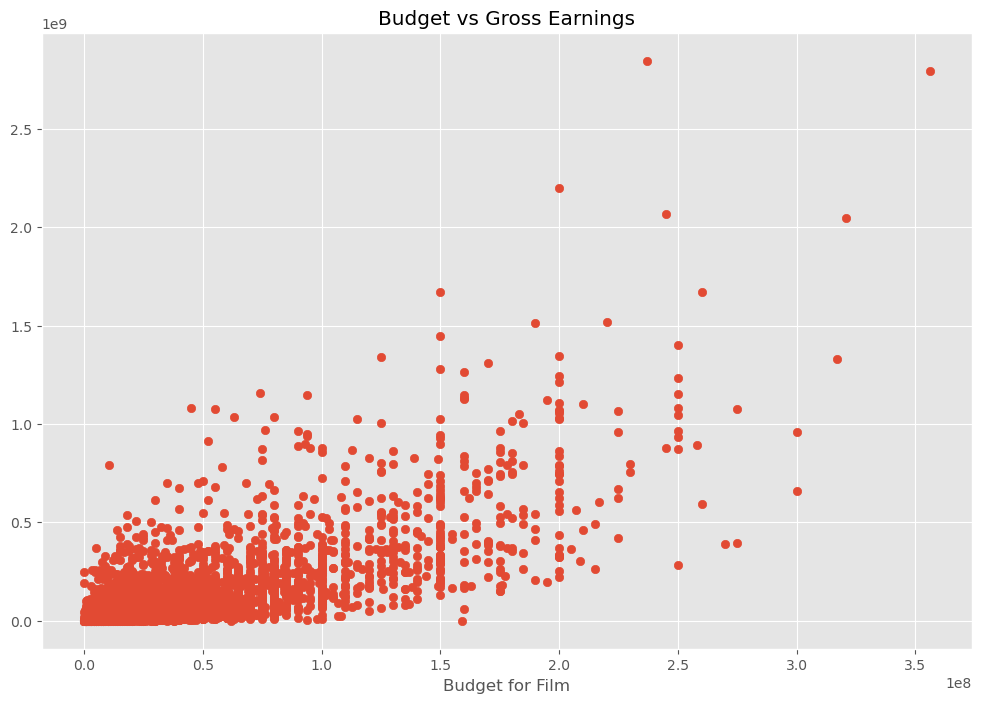

In [16]:
# Hypothesis 1: budget will have high correlation with gross revenue

# filter out negative value placeholders

filtered_df = df[(df['gross'] != -1) & (df['budget'] != -1) & (df['company'] != "Unknown")]

# Scatter plot with budget vs gross
plt.scatter(x=filtered_df['budget'], y=filtered_df['gross'])

# Labelling scatter plot
plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross Earnings")
plt.xlabel("Budget for Film")
plt.show()



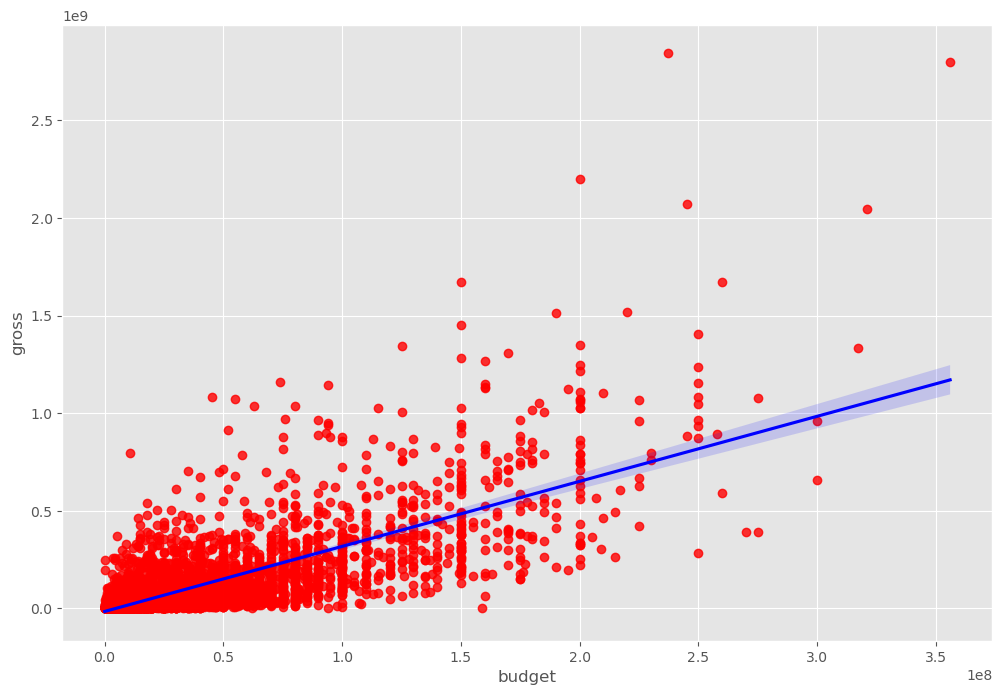

In [17]:
# Plot budget vs gross using seaborn and regression plot
filtered_df = df[(df['gross'] != -1) & (df['budget'] != -1) & (df['company'] != "Unknown")]
sns.regplot(x='budget', y='gross', data=filtered_df, scatter_kws={'color': "red"}, line_kws={'color':"blue"})
plt.show()

In [19]:
# Calculate correlation ("pearson's")
filtered_df = df[(df['gross'] != -1) & (df['budget'] != -1) & (df['company'] != "Unknown")]
filtered_df.corr(method = 'pearson', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.054837,0.205524,0.327531,0.274101,0.072769
score,0.054837,1.000000,0.473738,0.071609,0.222034,0.414330
votes,0.205524,0.473738,1.000000,0.439925,0.614858,0.351676
budget,0.327531,0.071609,0.439925,1.000000,0.740364,0.317406
gross,0.274101,0.222034,0.614858,0.740364,1.000000,0.275027
runtime,0.072769,0.414330,0.351676,0.317406,0.275027,1.000000


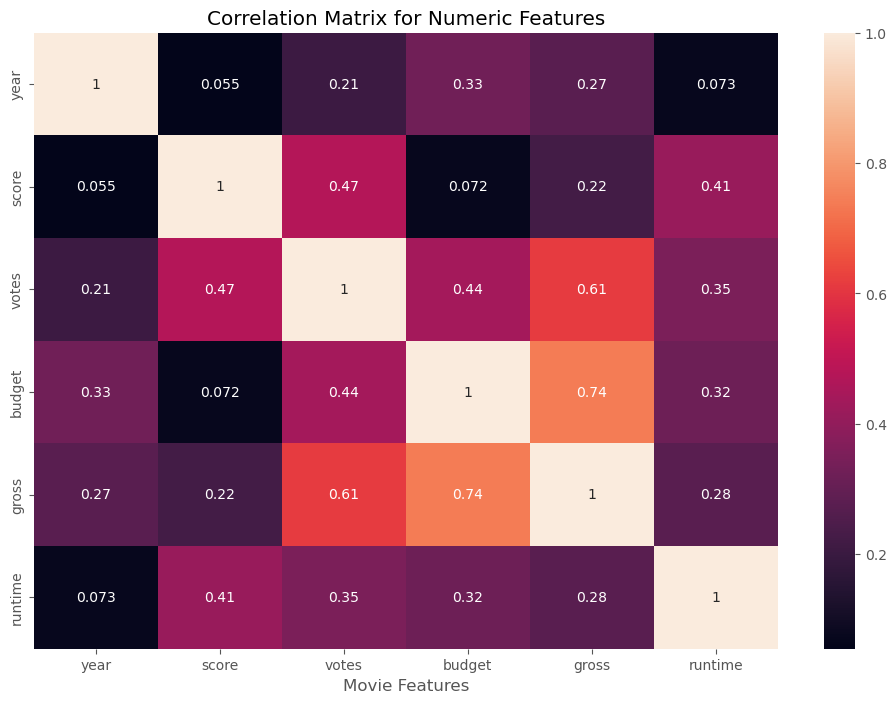

In [23]:
# Visualize correlation


numeric_df = filtered_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr(method ='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.xlabel("Movie Features")
plt.show()

In [34]:
# Look at Company Correlation, but not numeric though
# Instead, we can represent companies with numbers, numerize each company

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized)[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released,country_released,year_released_raw,year_released_date,year_released_clean
0,6587,6,6,1980,8.4,927000,2589,4014,1047,54,19000000,46998772,2320,146,1488,56,1488,1980-06-13,17
1,5573,6,1,1980,5.8,65000,2269,1632,327,55,4500000,58853106,731,104,1289,56,1289,1980-07-02,21
2,5142,4,0,1980,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,1543,56,1543,1980-06-20,18
3,286,4,4,1980,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,1289,56,1289,1980-07-02,21
4,1027,6,4,1980,7.3,108000,1054,521,410,55,6000000,39846344,1777,98,1338,56,1338,1980-07-25,25


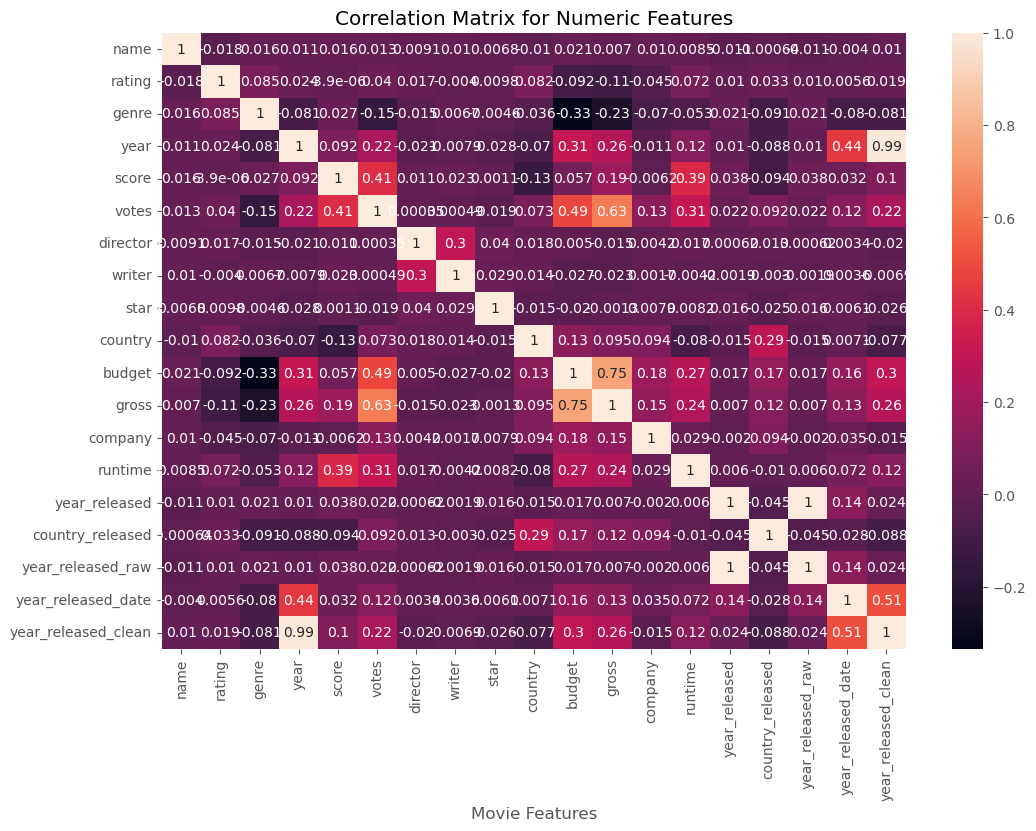

In [33]:
# Visualize correlation


correlation_matrix = df_numerized.corr(method ='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.xlabel("Movie Features")
plt.show()

#

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs) > 0.5]


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
